# NN Feature

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from keras.models import Model
from sklearn.preprocessing import StandardScaler


In [2]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true-y_pred)/y_true)))

X_train = pd.read_pickle('./397/X_train_tf.pkl').astype(float)
y_train = pd.read_pickle('./397/y_train_tf.pkl').astype(float)
X_val = pd.read_pickle('./397/X_val_tf.pkl').astype(float)
y_val = pd.read_pickle('./397/y_val_tf.pkl').astype(float)
X_test = pd.read_pickle('./397/X_test_tf.pkl').astype(float)
y_test = pd.read_pickle('./397/y_test_tf.pkl').astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

inputs= tf.keras.Input(
        shape=(X_train.shape[1],)
    )
hidden1=tf.keras.layers.Dense(
        units=int(np.round(X_train.shape[1]/2, 0)),
        kernel_initializer='he_uniform',
        activation='LeakyReLU'
    )(inputs)
hidden2=tf.keras.layers.Dense(
        units=int(np.round(X_train.shape[1]/4, 0)),
        kernel_initializer='he_uniform',
        activation='LeakyReLU'
    )(hidden1)
    
outputs=tf.keras.layers.Dense(
        units=1,
)(hidden2)

model = Model(inputs, outputs)
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=rmspe)

rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=1e-5, min_lr=1e-5, verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=11, restore_best_weights=True, verbose=1)
callback_list = [rlr, es]
history = model.fit(X_train, y_train,
                    batch_size=500, epochs=1000, verbose=1,
                    validation_data=(X_val, y_val), callbacks=callback_list
)

print(pd.DataFrame(history.history))
epochs=np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='training loss')
plt.plot(epochs, history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs=np.arange(2, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'][1:], label='training loss')
plt.plot(epochs, history.history['val_loss'][1:], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

a = np.array([]).reshape(0, 1)

for x in range (1, 42):
    length = int((X_test.shape[0] / 41))
    test = X_test[length*(x-1):length*(x)]
    
    y_hat = model.predict(test)
    a = np.append(a, y_hat)

result_rmspe = np.sqrt(np.mean(np.square(((a - y_test) / y_test)), axis=0))
print('RMSPE :', result_rmspe)
    

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-22 18:02:47.329821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 18:02:47.330040: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 397)]             0         
_________________________________________________________________
dense (Dense)                (None, 198)               78804     
_________________________________________________________________
dense_1 (Dense)              (None, 99)                19701     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 100       
Total params: 98,605
Trainable params: 98,605
Non-trainable params: 0
_________________________________________________________________


2022-11-22 18:02:47.994797: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 18:02:48.138289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/1000
599/599 [==============================] - ETA: 0s - loss: 53.8095

2022-11-22 18:02:54.280624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


599/599 [==============================] - 7s 9ms/step - loss: 53.8095 - val_loss: 23.2203
Epoch 2/1000
187/599 [========>.....................] - ETA: 2s - loss: 28.3957

# Base Feature

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 335)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 168)               56448     
_________________________________________________________________
dense_4 (Dense)              (None, 84)                14196     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 85        
Total params: 70,729
Trainable params: 70,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
 10/599 [..............................] - ETA: 3s - loss: 421.2015  

2022-10-25 02:23:39.495964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


598/599 [============================>.] - ETA: 0s - loss: 57.6953

2022-10-25 02:23:42.966538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


599/599 [==============================] - 4s 6ms/step - loss: 57.6894 - val_loss: 26.2735
Epoch 2/1000
599/599 [==============================] - 4s 6ms/step - loss: 20.0381 - val_loss: 10.7381
Epoch 3/1000
599/599 [==============================] - 3s 6ms/step - loss: 9.6133 - val_loss: 7.4227
Epoch 4/1000
599/599 [==============================] - 3s 6ms/step - loss: 6.2952 - val_loss: 5.3667
Epoch 5/1000
599/599 [==============================] - 4s 6ms/step - loss: 4.6377 - val_loss: 4.2817
Epoch 6/1000
599/599 [==============================] - 4s 6ms/step - loss: 4.0275 - val_loss: 2.8599
Epoch 7/1000
599/599 [==============================] - 3s 6ms/step - loss: 3.7057 - val_loss: 2.4433
Epoch 8/1000
599/599 [==============================] - 3s 6ms/step - loss: 6.2298 - val_loss: 2.3900
Epoch 9/1000
599/599 [==============================] - 3s 6ms/step - loss: 3.6891 - val_loss: 2.8719
Epoch 10/1000
599/599 [==============================] - 3s 6ms/step - loss: 2.4763 - val_l

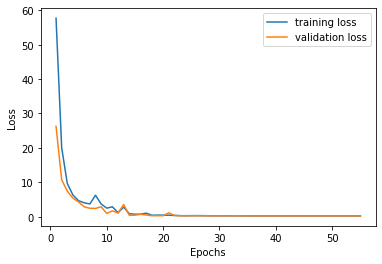

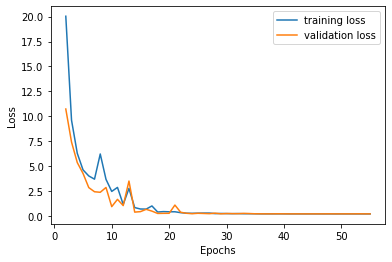

2022-10-25 02:26:58.357759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


RMSPE : 0.24309704699707682


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from keras.models import Model
from sklearn.preprocessing import StandardScaler

def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true-y_pred)/y_true)))

X_train = pd.read_pickle('./397/X_train_base.pkl').astype(float)
y_train = pd.read_pickle('./397/y_train_base.pkl').astype(float)
X_val = pd.read_pickle('./397/X_val_base.pkl').astype(float)
y_val = pd.read_pickle('./397/y_val_base.pkl').astype(float)
X_test = pd.read_pickle('./397/X_test_base.pkl').astype(float)
y_test = pd.read_pickle('./397/y_test_base.pkl').astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)
X_train.shape[1]

inputs= tf.keras.Input(
        shape=(X_train.shape[1],)
    )
hidden1=tf.keras.layers.Dense(
        units=int(np.round(X_train.shape[1]/2, 0)),
        kernel_initializer='he_uniform',
        activation='LeakyReLU'
    )(inputs)
hidden2=tf.keras.layers.Dense(
        units=int(np.round(X_train.shape[1]/4, 0)),
        kernel_initializer='he_uniform',
        activation='LeakyReLU'
    )(hidden1)
outputs=tf.keras.layers.Dense(
        units=1,
)(hidden2)

model = Model(inputs, outputs)
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=rmspe)
              
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=1e-5, min_lr=1e-5, verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=11, restore_best_weights=True, verbose=1)
callback_list = [rlr, es]
history = model.fit(X_train, y_train,
                    batch_size=500, epochs=1000, verbose=1,
                    validation_data=(X_val, y_val), callbacks=callback_list
)
pd.DataFrame(history.history)
epochs=np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='training loss')
plt.plot(epochs, history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs=np.arange(2, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'][1:], label='training loss')
plt.plot(epochs, history.history['val_loss'][1:], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

a = np.array([]).reshape(0, 1)

for x in range (1, 42):
    length = int((X_test.shape[0] / 41))
    test = X_test[length*(x-1):length*(x)]
    
    y_hat = model.predict(test)
    #print(y_hat)
    a = np.append(a, y_hat)

result_rmspe = np.sqrt(np.mean(np.square(((a - y_test) / y_test)), axis=0))
print('RMSPE :', result_rmspe)
    

# Parameter Tuning

In [2]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true-y_pred)/y_true)))

In [29]:
first_neuron = X_train.shape[1]
neuron = 2
hidden = 3

neuron_list = np.round(np.linspace(0, fit_, layer), 0).astype(int)
neuron_list

array([  0, 198, 397])

In [16]:
for x in range(2):
    print(x)

0
1


In [3]:
def build_model (train_set, n_hidden=2, n_neurons=3, learning_rate=0.01):

    input_shape = train_set.shape[1]

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(
            units = n_neurons,
            kernel_initializer='he_uniform',
            activation='LeakyReLU'
        ))

    model.add(tf.keras.layers.Dense(
        units=1
    ))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss=rmspe)

    return model


In [4]:
X_train = pd.read_pickle('./397/X_train_tf.pkl').astype(float)
y_train = pd.read_pickle('./397/y_train_tf.pkl').astype(float)
X_val = pd.read_pickle('./397/X_val_tf.pkl').astype(float)
y_val = pd.read_pickle('./397/y_val_tf.pkl').astype(float)
X_test = pd.read_pickle('./397/X_test_tf.pkl').astype(float)
y_test = pd.read_pickle('./397/y_test_tf.pkl').astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)


In [5]:
build_model(X_train).summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 1194      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


2022-10-28 15:33:13.358080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-28 15:33:13.358244: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=1e-5, min_lr=1e-5, verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=11, restore_best_weights=True, verbose=1)
callback_list = [rlr, es]

In [9]:
from scikeras.wrappers import KerasRegressor
keras_regressor = KerasRegressor(build_model, train_set=X_train, n_hidden=1, n_neurons=100, learning_rate=0.01)

from sklearn.model_selection import GridSearchCV

parameters={
    'n_hidden':[1, 2, 3],
    'n_neurons':[100, 200, 300]
            }

keras_regressor_search = GridSearchCV(keras_regressor, param_grid=parameters, cv=3, refit=True)



In [23]:
keras_regressor_search.param_grid

{'n_hidden': [1, 2, 3], 'n_neurons': [100, 200, 300]}

In [10]:
keras_regressor_search.set_params(fit__epochs=1000, fit__batch_size=500,
                                  fit__validation_data=(X_val, y_val),
                                  fit__callbacks=[rlr, es],
                                  fit__verbose=2)

ValueError: Invalid parameter fit for estimator GridSearchCV(cv=3,
             estimator=KerasRegressor(learning_rate=0.01, model=<function build_model at 0x28d7de550>, n_hidden=1, n_neurons=100, train_set=array([[-1.36412775, -1.36341492,  0.133776  , ..., -0.69904194,
         0.79283588,  0.41639624],
       [-1.65941306, -1.6573919 ,  0.48237182, ..., -0.80065274,
         0.35373098,  0.08137937],
       [ 0.65119448,  0.64547804, -0.48118753, ..., -0.57619882,
         3.12373906,  2.79337836],
       ...,
       [ 1.54443253,  1.55129718,  0.4577698 , ...,  1.09886239,
        -0.79834187, -0.98116245],
       [ 0.57737315,  0.57599297, -0.12024844, ...,  0.15062149,
        -0.55691501, -0.47507203],
       [ 0.35590917,  0.35069094, -0.47949512, ..., -0.33089206,
         0.48079957,  0.33372784]])),
             param_grid={'n_hidden': [1, 2, 3], 'n_neurons': [100, 200, 300]}). Check the list of available parameters with `estimator.get_params().keys()`.